In [49]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [21]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Today we are going to observe if we can teach AI to distinguish between "sweets" and "spicy".

Here is the reference blog: https://towardsdatascience.com/classifying-cats-vs-dogs-a-beginners-guide-to-deep-learning-4469ffed086c

In [50]:
!pip install -q jmd_imagescraper

In [51]:
!pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *


In [52]:
food=['sweets','spicy']
path = Path().cwd()/"food"#assigns path to current working directory

In [53]:
duckduckgo_search(path,"sweets","sweets",max_results=100) #downloads 100 images of 'sweets' and saves it in path/sweet

Duckduckgo search: sweets


[Path('/content/food/sweets/101_db920d6f.jpg'),
 Path('/content/food/sweets/102_26ef9769.jpg'),
 Path('/content/food/sweets/103_6276d57b.jpg'),
 Path('/content/food/sweets/104_5c9900b9.jpg'),
 Path('/content/food/sweets/105_7754f427.jpg'),
 Path('/content/food/sweets/106_e98198a8.jpg'),
 Path('/content/food/sweets/107_e6e9ef88.jpg'),
 Path('/content/food/sweets/108_7cefd834.jpg'),
 Path('/content/food/sweets/109_1d35d375.jpg'),
 Path('/content/food/sweets/110_e5cfbce4.jpg'),
 Path('/content/food/sweets/111_aeffedd6.jpg'),
 Path('/content/food/sweets/112_18623de7.jpg'),
 Path('/content/food/sweets/113_cd93923d.jpg'),
 Path('/content/food/sweets/114_f0c422de.jpg'),
 Path('/content/food/sweets/115_3ba30268.jpg'),
 Path('/content/food/sweets/116_3d0e94be.jpg'),
 Path('/content/food/sweets/117_6ae2904b.jpg'),
 Path('/content/food/sweets/118_980c3ed1.jpg'),
 Path('/content/food/sweets/119_72edbe2a.jpg'),
 Path('/content/food/sweets/120_1204be16.jpg'),
 Path('/content/food/sweets/121_2221b373

In [54]:
duckduckgo_search(path,"spicy","spicy",max_results=100)#downloads 100 images of 'disgusting' and saves it in path/disgusting


Duckduckgo search: spicy


[Path('/content/food/spicy/101_725e9706.jpg'),
 Path('/content/food/spicy/102_58a59a1e.jpg'),
 Path('/content/food/spicy/103_683aea7d.jpg'),
 Path('/content/food/spicy/104_f2a31f02.jpg'),
 Path('/content/food/spicy/105_abe90662.jpg'),
 Path('/content/food/spicy/106_c16de1e7.jpg'),
 Path('/content/food/spicy/107_06c50394.jpg'),
 Path('/content/food/spicy/108_8aef1bdc.jpg'),
 Path('/content/food/spicy/109_c219268d.jpg'),
 Path('/content/food/spicy/110_a470d7c5.jpg'),
 Path('/content/food/spicy/111_27fe806c.jpg'),
 Path('/content/food/spicy/112_8bbe92bc.jpg'),
 Path('/content/food/spicy/113_8bac8043.jpg'),
 Path('/content/food/spicy/114_2d6e3eb9.jpg'),
 Path('/content/food/spicy/115_ceecafc9.jpg'),
 Path('/content/food/spicy/116_2972dc94.jpg'),
 Path('/content/food/spicy/117_5cee5252.jpg'),
 Path('/content/food/spicy/118_1612049e.jpg'),
 Path('/content/food/spicy/119_ce3a04f1.jpg'),
 Path('/content/food/spicy/120_daf2f016.jpg'),
 Path('/content/food/spicy/121_8a1f35a5.jpg'),
 Path('/conte

In [55]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [56]:
fns=get_image_files(path)
fns

(#1199) [Path('/content/food/disgusting/019_39f576ef.jpg'),Path('/content/food/disgusting/086_50962336.jpg'),Path('/content/food/disgusting/004_b2019059.jpg'),Path('/content/food/disgusting/064_a0115331.jpg'),Path('/content/food/disgusting/011_8c5a28cc.jpg'),Path('/content/food/disgusting/042_f2902033.jpg'),Path('/content/food/disgusting/055_64232dbe.jpg'),Path('/content/food/disgusting/029_056c68b4.jpg'),Path('/content/food/disgusting/070_b67dc629.jpg'),Path('/content/food/disgusting/013_4e2f7e57.jpg')...]

In [57]:
failed=verify_images(fns)#looks for files that arent images
failed

(#0) []

In [58]:
failed.map(Path.unlink);#unlinks the failed files from the folder


In [59]:
food=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [60]:
dls=food.dataloaders(path)

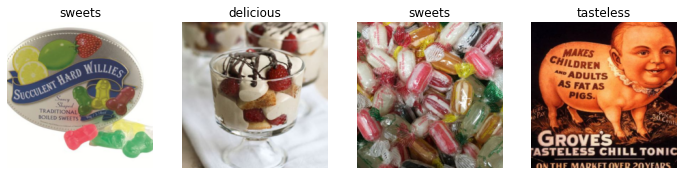

In [61]:
dls.valid.show_batch(max_n=4,nrows=1)

In [62]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)#training our model
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,2.940153,1.781191,0.531381,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.785272,1.477302,0.460251,00:11
1,1.501748,1.319645,0.410042,00:13
2,1.221551,1.294971,0.422594,00:10
3,1.035756,1.282845,0.414226,00:09


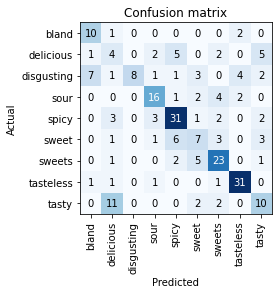

In [63]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()#plots a confusion matrix

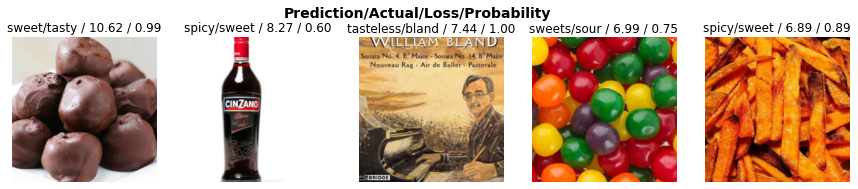

In [64]:
interp.plot_top_losses(5, nrows=1)


In [ ]:

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

In [65]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')



In [19]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl


IndexError: ignored

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred 